This is a draft of replication using the GSCI method.

In [2]:
import pandas as pd

In [5]:
df = pd.read_parquet("gsci_indices.parquet")
df['Date'] = pd.to_datetime(df['index'])
df = df.sort_values('Date')
df = df.drop(columns = "index")

df_monthly = df.groupby(df['Date'].dt.to_period('M')).last().reset_index(drop=True)

index_cols = [col for col in df_monthly.columns if col.endswith('_PX_LAST')]

for col in index_cols:
    df_monthly[col + '_Return'] = df_monthly[col].pct_change()

df_monthly['yyyymm'] = df_monthly['Date'].dt.strftime('%Y%m')



In [ ]:
df_return = df_monthly.drop(columns = index_cols).set_index("yyyymm")

In [7]:
df_return.head(5)

,Date,SPGCBRP Index_PX_LAST_Return,SPGCGOP Index_PX_LAST_Return,SPGCCLP Index_PX_LAST_Return,SPGCHUP Index_PX_LAST_Return,SPGCHOP Index_PX_LAST_Return,SPGCNGP Index_PX_LAST_Return,SPGCCTP Index_PX_LAST_Return,SPGCKCP Index_PX_LAST_Return,SPGCCCP Index_PX_LAST_Return,...,SPGCLHP Index_PX_LAST_Return,SPGCFCP Index_PX_LAST_Return,SPGCLCP Index_PX_LAST_Return,SPGCGCP Index_PX_LAST_Return,SPGCSIP Index_PX_LAST_Return,SPGCIAP Index_PX_LAST_Return,SPGCIKP Index_PX_LAST_Return,SPGCILP Index_PX_LAST_Return,SPGCIZP Index_PX_LAST_Return,SPGCICP Index_PX_LAST_Return
yyyymm,,,,,,,,,,,,,,,,,,,,,
196411,1964-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196412,1964-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196501,1965-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196502,1965-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196503,1965-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
from extract_hkm_cmdty import *

hkm_df = extract_hkm_cmdty()

In [8]:
common_idx = hkm_df.index.intersection(df_return.index)

In [10]:
corr_matrix = pd.DataFrame(index=df_return.columns, columns=hkm_df.columns)

for col1 in df_return.columns:
    for col2 in hkm_df.columns:
        x = df_return[col1].fillna(0)
        y = hkm_df[col2].fillna(0)
        corr_matrix.loc[col1, col2] = x.corr(y)

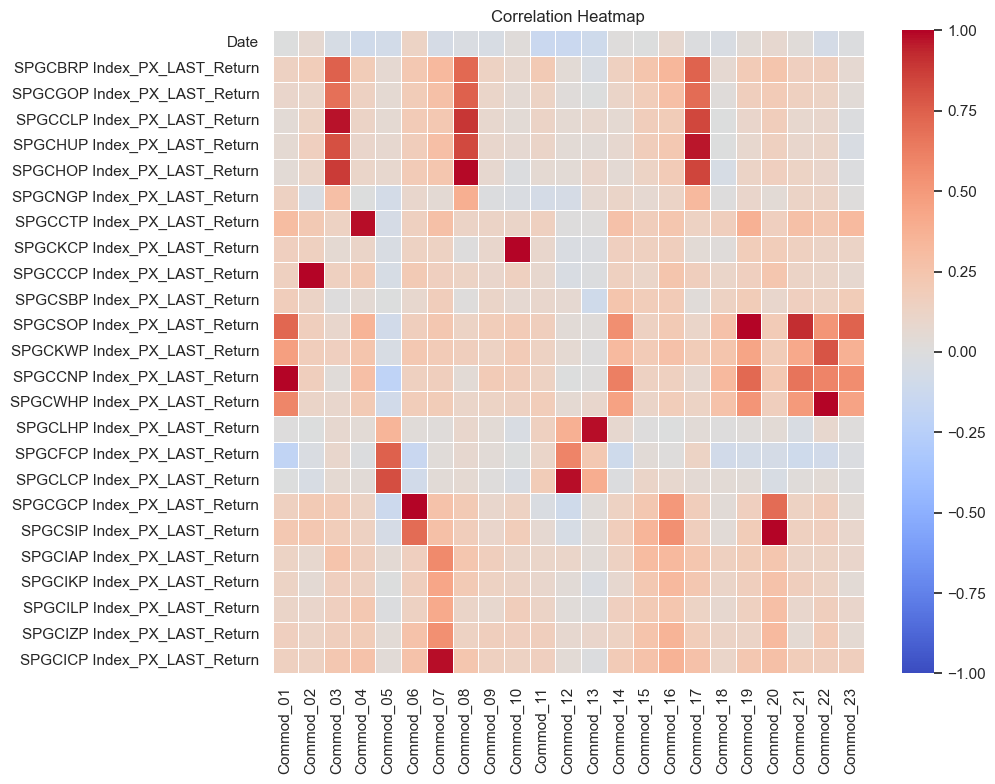

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix_float = corr_matrix.astype(float)

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix_float,
    annot=False,      
    fmt=".2f",       
    cmap="coolwarm",  
    vmin=-1, vmax=1,  
    square=True,
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [12]:
from scipy.optimize import linear_sum_assignment
cost_matrix = -corr_matrix.values.astype(float)

# Step 2: Solve assignment problem
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Step 3: Extract optimal pairs
optimal_pairs = []

for r, c in zip(row_ind, col_ind):
    row_label = corr_matrix.index[r]
    col_label = corr_matrix.columns[c]
    corr_value = corr_matrix.iloc[r, c]
    optimal_pairs.append((row_label, col_label, corr_value))

# Convert to DataFrame for easy viewing
optimal_pairs_df = pd.DataFrame(optimal_pairs, columns=['Commodity_1', 'Commodity_2', 'Correlation'])

# Sort by correlation (optional)
optimal_pairs_df = optimal_pairs_df.sort_values(by='Correlation', ascending=False)
optimal_pairs_df.reset_index(drop=True)

,Commodity_1,Commodity_2,Correlation
0,SPGCGCP Index_PX_LAST_Return,Commod_06,0.997829
1,SPGCSIP Index_PX_LAST_Return,Commod_20,0.996492
2,SPGCCCP Index_PX_LAST_Return,Commod_02,0.995033
3,SPGCKCP Index_PX_LAST_Return,Commod_10,0.994202
4,SPGCWHP Index_PX_LAST_Return,Commod_22,0.993406
5,SPGCSOP Index_PX_LAST_Return,Commod_19,0.993210
6,SPGCCNP Index_PX_LAST_Return,Commod_01,0.992284
7,SPGCHOP Index_PX_LAST_Return,Commod_08,0.989293
8,SPGCICP Index_PX_LAST_Return,Commod_07,0.983833
9,SPGCCTP Index_PX_LAST_Return,Commod_04,0.980607
